In [2]:
pip install mlrose_hiive

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.1.3-cp36-none-any.whl size=96602 sha256=ad97767a85ec201e27fe9c87e2a33abf881df327f4ac7e1dd91dbdf02ac760c7
  Stored in directory: /root/.cache/pip/wheels/ee/ef/8b/941402c2014649279f68a1ed4a37b4d15142dfb9c7e4a6b7ac
Successfully built mlrose-hiive


In [0]:
import mlrose_hiive
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [0]:
def generate_graph(filename, title, x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.legend()
    plt.show()
    plt.savefig(filename)
    plt.close()

In [0]:
# Count function evaluation counts
def om_fitness_fn(state):
    global eval_count
    fitness = mlrose_hiive.OneMax()
    eval_count += 1
    return fitness.evaluate(state)

def rhc(problem, iterations, random_seed, graph_file, graph_title):
    fitness = []
    fit_time = []
    fn_evals = []
    global eval_count
    for i in iterations:
        eval_count = 0
        start = datetime.datetime.now()
        best_state, best_fitness, _ = mlrose_hiive.random_hill_climb(problem,
                                   max_iters=i, random_state=random_seed)
        finish = datetime.datetime.now()
        fitness.append(best_fitness)
        fit_time.append((finish - start).total_seconds())
        fn_evals.append(eval_count)

    plt.plot(iterations, fitness, label="Fitness score")
    plt.legend(loc="best")
    plt.grid()
    generate_graph(graph_file + "rhc", graph_title + "Random Hill Climbing",
                   "Iterations", "Fitness")
    print('Best score achieved: ', max(fitness))
    index = fitness.index(max(fitness))
    print('Time taken to achieve that: ', fit_time[index])
    print('Function evaluations taken to achieve that: ', fn_evals[index])

def sa(problem, iterations, random_seed, graph_file, graph_title):
    decays = [0.001, 0.002, 0.003, 0.004, 0.005]
    best_score = []
    time_taken = []
    fn_evals_taken = []
    # fig1, ax1 = plt.subplots()
    # fig2, ax2 = plt.subplots()
    global eval_count
    for decay in decays:
        schedule = mlrose_hiive.ArithDecay(init_temp=1.0, decay=decay)
        fitness = []
        fit_time = []
        fn_evals = []
        for i in iterations:
            eval_count = 0
            start = datetime.datetime.now()
            # Solve using simulated annealing - attempt 1
            best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule=schedule,
                                                                max_iters=i, random_state=random_seed)
            finish = datetime.datetime.now()
            fn_evals.append(eval_count)
            fitness.append(best_fitness)
            fit_time.append((finish - start).total_seconds())
            # print('iteration: ',i)
            # print('best_state:', best_state)
            # print('best_fitness: ', best_fitness)
        best_score.append(max(fitness))
        index = fitness.index(max(fitness))
        time_taken.append(fit_time[index])
        fn_evals_taken.append(fn_evals[index])
        # print('index: ', index)
        # print('time for that: ', fit_time[index])
        plt.plot(iterations, fitness, label="Cooling = " + str(decay))
        # ax2.plot(fn_evals, fitness, label="Cooling = " + str(decay))

    plt.legend(loc="best")
    plt.grid()
    generate_graph(graph_file + "sa_iter", graph_title + "Simulated Annealing", "Iterations", "Fitness")

    """
    ax2.legend(loc="best")
    ax2.grid()
    generate_graph("cp_sa_evals", "Continuous Peaks - Simulated Annealing", "Function evaluations", "Fitness")
    """
    # Decays best_score and time_taken
    plt.plot(decays, best_score)
    plt.grid()
    generate_graph(graph_file + "sa_decays", graph_title + "Simulated Annealing",
                   "Cooling Component", "Best Score Achieved")

    plt.plot(decays, time_taken)
    plt.grid()
    generate_graph(graph_file + "sa_decay_time", graph_title + "Simulated Annealing",
                   "Cooling Component", "Time taken to achieve that")

    plt.scatter(time_taken, best_score)
    for i, txt in enumerate(decays):
        plt.annotate(s=str(txt), xy=(time_taken[i], best_score[i]))
    plt.legend(loc='best', title='Cooling Component')
    plt.grid()
    generate_graph(graph_file + "sa_scatter", graph_title + "Simulated Annealing",
                   "Time Taken", "Best Score achieved")

    print('decays: ', decays)
    print('Best scores reached: ', best_score)
    print('Time taken to do that: ', time_taken)
    print('Function evaluations taken: ', fn_evals_taken)

def ga(problem, iterations, random_seed, graph_file, graph_title):
    mutation_prob = [0.1, 0.2, 0.3, 0.4, 0.5]
    best_score = []
    time_taken = []
    fn_evals_taken = []
    global eval_count
    for m in mutation_prob:
        fitness = []
        fit_time = []
        fn_evals = []
        for i in iterations:
            eval_count = 0
            start = datetime.datetime.now()
            best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem, mutation_prob=m,
                                                                max_iters=i, random_state=random_seed)
            finish = datetime.datetime.now()
            fitness.append(best_fitness)
            fit_time.append((finish - start).total_seconds())
            fn_evals.append(eval_count)
        # Find the best score achieved in that mutation prob
        best_score.append(max(fitness))
        index = fitness.index(max(fitness))
        # find the time that was taken to achieve that
        time_taken.append(fit_time[index])
        fn_evals_taken.append(fn_evals[index])
        plt.plot(iterations, fitness, label="Mutation = " + str(m))

    plt.legend(loc="best", title='Mutation Probability')
    plt.grid()
    generate_graph(graph_file + "ga", graph_title + "Genetic Algorithm", "Iterations", "Fitness")

    # Decays best_score and time_taken
    plt.plot(mutation_prob, best_score)
    plt.grid()
    generate_graph(graph_file + "ga_mut", graph_title + "Genetic Algorithm",
                   "Mutation Probability", "Best Score Achieved")

    """
    plt.plot(mutation_prob, time_taken)
    plt.grid()
    generate_graph("cp_sa_decay_time", "Continuous Peaks - Genetic Algorithm", "Mutation Probability",
                   "Time taken to achieve that")
    """

    plt.scatter(time_taken, best_score)
    for i, txt in enumerate(mutation_prob):
        plt.annotate(s=str(txt), xy=(time_taken[i], best_score[i]))
    plt.legend(loc='best', title='Mutation Probability')
    plt.grid()
    generate_graph(graph_file + "ga_scatter", graph_title + "Genetic Algorithm",
                   "Time Taken", "Best Score achieved")

    print('Mutation prob: ', mutation_prob)
    print('Best scores reached: ', best_score)
    print('Time taken to do that: ', time_taken)
    print('Function evaluations taken: ', fn_evals_taken)

def mimic(problem, iterations, random_seed, graph_file, graph_title):
    keep_pct = [0.1, 0.25, 0.50]
    best_score = []
    time_taken = []
    fn_evals_taken = []
    global eval_count
    for k in keep_pct:
        fitness = []
        fit_time = []
        fn_evals = []
        for i in iterations:
            eval_count = 0
            start = datetime.datetime.now()
            best_state, best_fitness, _ = mlrose_hiive.mimic(problem, keep_pct=k,
                                                            max_iters=i, random_state=random_seed)
            finish = datetime.datetime.now()
            fitness.append(best_fitness)
            fit_time.append((finish - start).total_seconds())
            fn_evals.append(eval_count)
        # Find the best score achieved in that mutation prob
        best_score.append(max(fitness))
        index = fitness.index(max(fitness))
        # find the time that was taken to achieve that
        time_taken.append(fit_time[index])
        fn_evals_taken.append(fn_evals[index])
        plt.plot(iterations, fitness, label="keep_pct = " + str(k))

    plt.legend(loc="best", title='Proportion of samples kept')
    plt.grid()
    generate_graph(graph_file + "mimic", graph_title + "MIMIC: ", "Iterations", "Fitness")

    # Decays best_score and time_taken
    plt.plot(keep_pct, best_score)
    plt.grid()
    generate_graph(graph_file + "mimic_pct", graph_title + "MIMIC",
                   "Proportion of samples kept", "Best Score Achieved")

    """
    plt.plot(mutation_prob, time_taken)
    plt.grid()
    generate_graph("cp_sa_decay_time", "Continuous Peaks - Genetic Algorithm", "Mutation Probability",
                   "Time taken to achieve that")
    """

    plt.scatter(time_taken, best_score)
    for i, txt in enumerate(keep_pct):
        plt.annotate(s=str(txt), xy=(time_taken[i], best_score[i]))
    plt.legend(loc='best', title='Proportion of samples kept')
    plt.grid()
    generate_graph(graph_file + "mimic_scatter", graph_title + "MIMIC",
                   "Time Taken", "Best Score achieved")

    print('Proportion of samples kept: ', keep_pct)
    print('Best scores reached: ', best_score)
    print('Time taken to do that: ', time_taken)
    print('Function evaluations taken: ', fn_evals_taken)


# Define One Max problem

In [42]:
# Initialize fitness function object using Custom function
fitness_fn = mlrose_hiive.CustomFitness(om_fitness_fn)
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness_fn, max_val=2)
max_iters = 1500
iterations = range(0, max_iters, 50)
random_seed = 1
graph_file = 'om_'
graph_title = 'One Max - '
print('***************One Max Optimization Problem*****************')

***************One Max Optimization Problem*****************


--------------Random Hill Climbing---------------


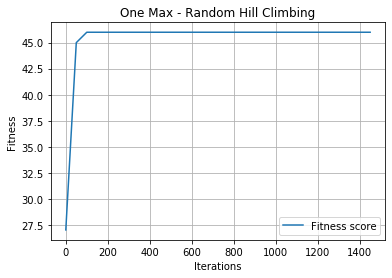

Best score achieved:  46.0
Time taken to achieve that:  0.00773
Function evaluations taken to achieve that:  88


In [43]:
# Random hill climbing
print('--------------Random Hill Climbing---------------')
rhc(problem,iterations,random_seed, graph_file, graph_title)

--------------Simulated Annealing---------------


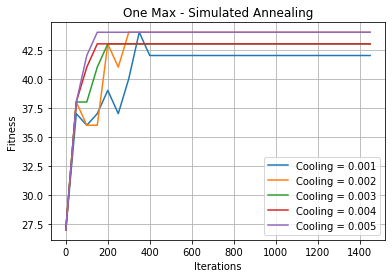

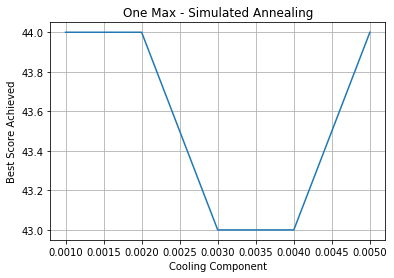

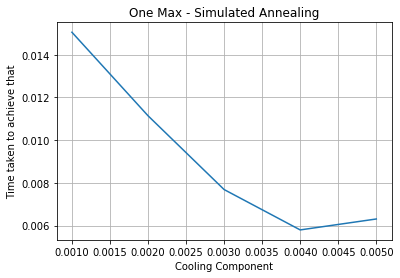

No handles with labels found to put in legend.


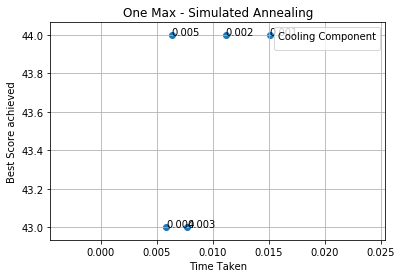

decays:  [0.001, 0.002, 0.003, 0.004, 0.005]
Best scores reached:  [44.0, 44.0, 43.0, 43.0, 44.0]
Time taken to do that:  [0.015056, 0.011145, 0.007688, 0.005797, 0.006309]
Function evaluations taken:  [526, 404, 280, 217, 214]


In [44]:
# simulate annealing
print('--------------Simulated Annealing---------------')
sa(problem, iterations, random_seed, graph_file, graph_title)

--------------Genetic Algorithm---------------


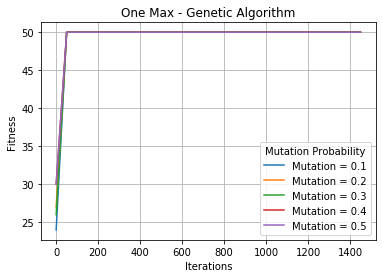

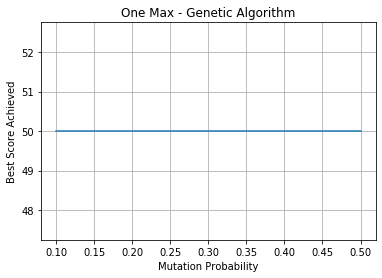

No handles with labels found to put in legend.


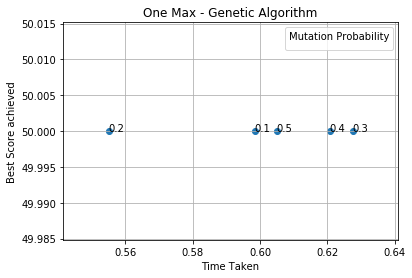

Mutation prob:  [0.1, 0.2, 0.3, 0.4, 0.5]
Best scores reached:  [50.0, 50.0, 50.0, 50.0, 50.0]
Time taken to do that:  [0.598413, 0.554985, 0.627527, 0.620722, 0.604987]
Function evaluations taken:  [6440, 6039, 6444, 6242, 6242]


In [45]:
# Genetic Algorithm
print('--------------Genetic Algorithm---------------')
ga(problem,iterations,random_seed, graph_file, graph_title)

--------------MIMIC---------------


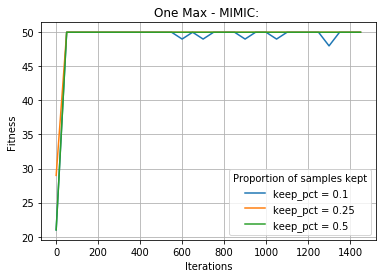

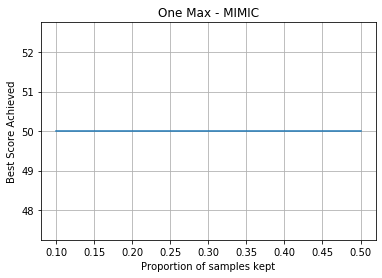

No handles with labels found to put in legend.


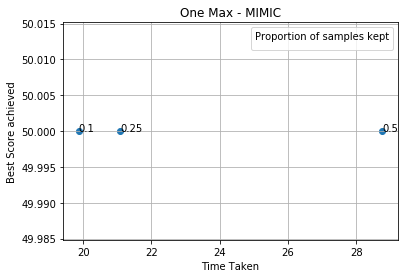

Proportion of samples kept:  [0.1, 0.25, 0.5]
Best scores reached:  [50.0, 50.0, 50.0]
Time taken to do that:  [19.869137, 21.090407, 28.76488]
Function evaluations taken:  [3221, 3625, 4833]


In [49]:
# MIMIC
print('--------------MIMIC---------------')
mimic(problem, iterations, random_seed, graph_file, graph_title)